In [1]:
#pip install ipympl

import numpy as np
import pandas as pd
import math
#import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')
from operator import is_not
import os


from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize':(18, 9)})

### import libraries and files


In [2]:
coins_spend_original = pd.read_csv("coins_spend_02_24.csv", index_col="user_id") # delimiter='\t',
coins_spend_original['user_id'] = coins_spend_original.index
#coins_spend_original.tail

In [3]:
coins_spend_original['day'] = coins_spend_original['date'].str[8:10]
coins_spend_original['day'] = pd.to_numeric(coins_spend_original['day'].str.replace('\D', ''), errors='coerce')
coins_spend_original['mounth'] = coins_spend_original['date'].str[5:7]
coins_spend_original['year'] = coins_spend_original['date'].str[0:4]
coins_spend_original = coins_spend_original.drop (columns = ['date'])
coins_spend_original

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,status,coins,user_id,day,mounth,year
user_id,,,,,,
300071,rejected,20,300071,2,05,2022
425696,rejected,14,425696,2,05,2022
332362,successful,3,332362,2,05,2022
402234,rejected,10,402234,2,05,2022
261026,rejected,21,261026,2,05,2022
...,...,...,...,...,...,...
35151,rejected,6,35151,24,05,2022
356515,rejected,20,356515,24,05,2022
518881,rejected,15,518881,24,05,2022


In [4]:
X = coins_spend_original.iloc [:,[1,1]].values

###clusterization of golden_csv
and 
### Method Kmeans 


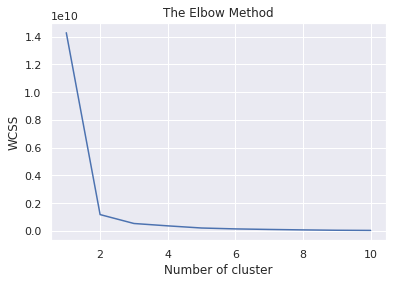

In [5]:
wcss = []
for i in range (1,11):
  kmeans =KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range (1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans (n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

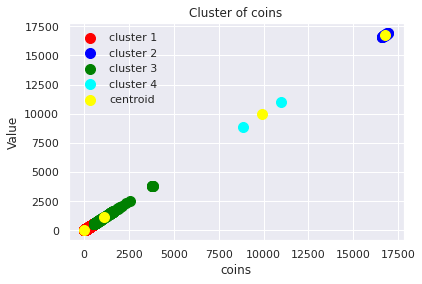

In [7]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
#plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s = 100, c = 'yellow', label = 'centroid')
plt.title ('Cluster of coins')
plt.xlabel ('coins')
plt.ylabel ('Value')
plt.legend()
plt.show()

### import csv with activities of users

In [8]:
aclivity_original = pd.read_csv("activity.csv", index_col="user_id") # delimiter='\t',
aclivity_original['user_id'] = aclivity_original.index
aclivity_original


,id,created,modified,summary_activity,collection_activity,last_activity,referral_activity,country_activity,event_activity,user_id
user_id,,,,,,,,,,
339824,90,2022-04-27 11:32:16.060194+00,2022-05-13 22:59:10.581511+00,21,15,1,0,5,0,339824
117477,16,2022-04-27 11:29:12.149032+00,2022-04-27 15:19:33.262239+00,44,30,1,0,3,10,117477
231716,21,2022-04-27 11:29:24.585197+00,2022-05-22 02:07:37.725148+00,39,27,1,2,4,5,231716
105716,74,2022-04-27 11:31:33.746618+00,2022-05-21 08:43:51.450263+00,63,48,1,0,4,10,105716
235660,26,2022-04-27 11:29:28.342816+00,2022-05-05 11:07:05.635872+00,18,15,1,0,2,0,235660
...,...,...,...,...,...,...,...,...,...,...
515203,71159,2022-05-24 09:56:18.20248+00,2022-05-24 09:56:18.20248+00,3,0,1,0,2,0,515203
111235,71160,2022-05-24 09:58:06.392404+00,2022-05-24 09:58:06.392404+00,33,21,1,0,1,10,111235
236901,71161,2022-05-24 09:58:27.862909+00,2022-05-24 09:58:27.862909+00,1,0,1,0,0,0,236901


### clusterization for collection_activity, referral_activity and event_activity

In [9]:
X = aclivity_original.iloc [:,[4,6,8]].values

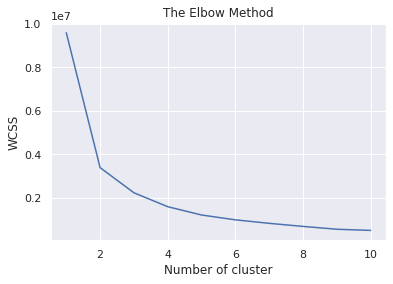

In [10]:
wcss = []
for i in range (1,11):
  kmeans =KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range (1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans (n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

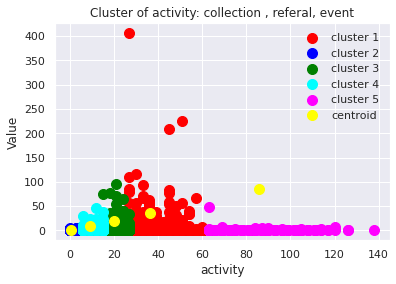

In [12]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s = 100, c = 'yellow', label = 'centroid')
plt.title ('Cluster of activity: collection , referal, event')
plt.xlabel ('activity')
plt.ylabel ('Value')
plt.legend()
plt.show()

### clusterization for collection_activity and referral_activity 

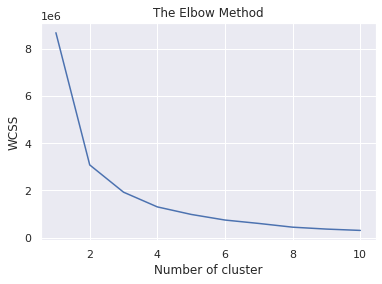

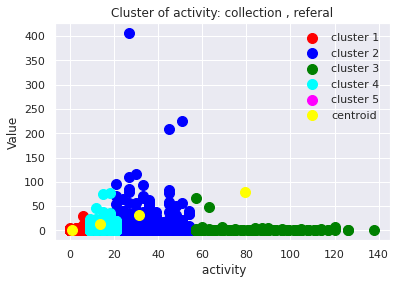

In [13]:
X = aclivity_original.iloc [:,[4,6]].values
wcss = []
for i in range (1,11):
  kmeans =KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

kmeans = KMeans (n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.plot(range (1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s = 100, c = 'yellow', label = 'centroid')
plt.title ('Cluster of activity: collection , referal')
plt.xlabel (' activity')
plt.ylabel ('Value')
plt.legend()
plt.show()

### clusterization for collection_activity and event_activity

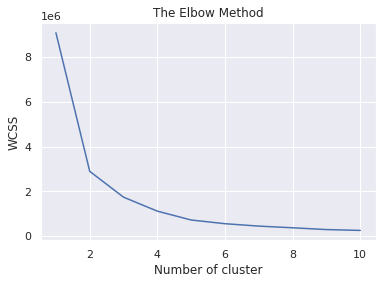

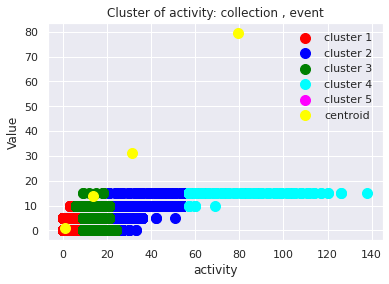

In [14]:
X = aclivity_original.iloc [:,[4,8]].values
wcss = []
for i in range (1,11):
  kmeans =KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range (1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans (n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s = 100, c = 'yellow', label = 'centroid')
plt.title ('Cluster of activity: collection , event')
plt.xlabel ('activity')
plt.ylabel ('Value')
plt.legend()
plt.show()

### clusterization for collection_activity, referral_activity and last_activity

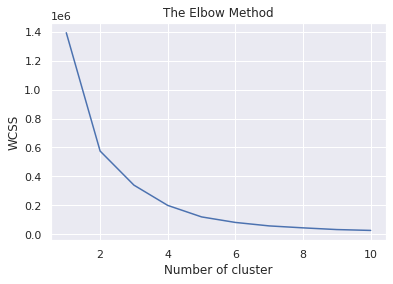

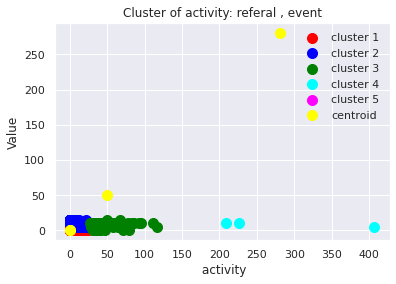

In [15]:
X = aclivity_original.iloc [:,[6,8]].values
wcss = []
for i in range (1,11):
  kmeans =KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range (1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans (n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s = 100, c = 'yellow', label = 'centroid')
plt.title ('Cluster of activity: referal , event')
plt.xlabel (' activity')
plt.ylabel ('Value')
plt.legend()
plt.show()